## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9762195	total: 70.1ms	remaining: 1m 9s
1:	learn: 0.9588791	total: 71.3ms	remaining: 35.6s
2:	learn: 0.9386428	total: 72.3ms	remaining: 24s
3:	learn: 0.9227238	total: 73.5ms	remaining: 18.3s
4:	learn: 0.9059826	total: 74.6ms	remaining: 14.8s
5:	learn: 0.8889105	total: 75.6ms	remaining: 12.5s
6:	learn: 0.8712206	total: 76.6ms	remaining: 10.9s
7:	learn: 0.8549653	total: 77.6ms	remaining: 9.62s
8:	learn: 0.8403972	total: 78.7ms	remaining: 8.66s
9:	learn: 0.8246089	total: 79.7ms	remaining: 7.89s
10:	learn: 0.8097963	total: 80.7ms	remaining: 7.25s
11:	learn: 0.7948659	total: 81.7ms	remaining: 6.73s
12:	learn: 0.7802906	total: 82.6ms	remaining: 6.27s
13:	learn: 0.7657933	total: 83.6ms	remaining: 5.88s
14:	learn: 0.7516619	total: 84.5ms	remaining: 5.55s
15:	learn: 0.7371965	total: 85.3ms	remaining: 5.25s
16:	learn: 0.7257918	total: 86.2ms	remaining: 4.98s
17:	learn: 0.7135113	total: 87.1ms	remaining: 4.75s
18:	learn: 0.7016889	total: 87.9ms	remaining: 

43:	learn: 0.4934073	total: 108ms	remaining: 2.35s
44:	learn: 0.4872670	total: 109ms	remaining: 2.32s
45:	learn: 0.4815806	total: 110ms	remaining: 2.29s
46:	learn: 0.4762199	total: 111ms	remaining: 2.25s
47:	learn: 0.4701891	total: 112ms	remaining: 2.23s
48:	learn: 0.4659017	total: 113ms	remaining: 2.2s
49:	learn: 0.4607218	total: 114ms	remaining: 2.17s
50:	learn: 0.4550746	total: 115ms	remaining: 2.14s
51:	learn: 0.4493934	total: 116ms	remaining: 2.11s
52:	learn: 0.4442933	total: 116ms	remaining: 2.08s
53:	learn: 0.4410787	total: 117ms	remaining: 2.05s
54:	learn: 0.4364582	total: 118ms	remaining: 2.02s
55:	learn: 0.4324778	total: 118ms	remaining: 2s
56:	learn: 0.4282111	total: 119ms	remaining: 1.97s
57:	learn: 0.4231127	total: 120ms	remaining: 1.95s
58:	learn: 0.4191208	total: 121ms	remaining: 1.93s
59:	learn: 0.4154291	total: 122ms	remaining: 1.92s
60:	learn: 0.4111227	total: 123ms	remaining: 1.89s
61:	learn: 0.4076752	total: 124ms	remaining: 1.87s
62:	learn: 0.4047119	total: 125ms	r

137:	learn: 0.2649106	total: 190ms	remaining: 1.19s
138:	learn: 0.2640067	total: 191ms	remaining: 1.18s
139:	learn: 0.2631264	total: 192ms	remaining: 1.18s
140:	learn: 0.2624763	total: 193ms	remaining: 1.17s
141:	learn: 0.2619153	total: 193ms	remaining: 1.17s
142:	learn: 0.2615359	total: 194ms	remaining: 1.16s
143:	learn: 0.2604887	total: 195ms	remaining: 1.16s
144:	learn: 0.2595853	total: 196ms	remaining: 1.16s
145:	learn: 0.2584656	total: 197ms	remaining: 1.15s
146:	learn: 0.2573479	total: 198ms	remaining: 1.15s
147:	learn: 0.2561414	total: 199ms	remaining: 1.14s
148:	learn: 0.2552889	total: 200ms	remaining: 1.14s
149:	learn: 0.2546977	total: 200ms	remaining: 1.14s
150:	learn: 0.2537790	total: 201ms	remaining: 1.13s
151:	learn: 0.2531645	total: 202ms	remaining: 1.13s
152:	learn: 0.2524049	total: 203ms	remaining: 1.12s
153:	learn: 0.2514042	total: 204ms	remaining: 1.12s
154:	learn: 0.2504167	total: 205ms	remaining: 1.12s
155:	learn: 0.2496538	total: 206ms	remaining: 1.11s
156:	learn: 

262:	learn: 0.1955857	total: 296ms	remaining: 831ms
263:	learn: 0.1949301	total: 297ms	remaining: 829ms
264:	learn: 0.1945219	total: 298ms	remaining: 827ms
265:	learn: 0.1943449	total: 299ms	remaining: 825ms
266:	learn: 0.1935992	total: 300ms	remaining: 823ms
267:	learn: 0.1934862	total: 301ms	remaining: 821ms
268:	learn: 0.1930117	total: 301ms	remaining: 819ms
269:	learn: 0.1928576	total: 302ms	remaining: 817ms
270:	learn: 0.1924267	total: 303ms	remaining: 815ms
271:	learn: 0.1922802	total: 304ms	remaining: 813ms
272:	learn: 0.1917460	total: 305ms	remaining: 811ms
273:	learn: 0.1913364	total: 305ms	remaining: 809ms
274:	learn: 0.1912076	total: 306ms	remaining: 807ms
275:	learn: 0.1906133	total: 307ms	remaining: 805ms
276:	learn: 0.1905238	total: 308ms	remaining: 803ms
277:	learn: 0.1900627	total: 309ms	remaining: 801ms
278:	learn: 0.1899776	total: 310ms	remaining: 800ms
279:	learn: 0.1898583	total: 310ms	remaining: 798ms
280:	learn: 0.1897414	total: 311ms	remaining: 796ms
281:	learn: 

364:	learn: 0.1638858	total: 380ms	remaining: 662ms
365:	learn: 0.1635576	total: 381ms	remaining: 661ms
366:	learn: 0.1632631	total: 382ms	remaining: 659ms
367:	learn: 0.1630012	total: 383ms	remaining: 658ms
368:	learn: 0.1625476	total: 384ms	remaining: 656ms
369:	learn: 0.1624986	total: 385ms	remaining: 655ms
370:	learn: 0.1621613	total: 385ms	remaining: 653ms
371:	learn: 0.1615703	total: 386ms	remaining: 652ms
372:	learn: 0.1613200	total: 387ms	remaining: 651ms
373:	learn: 0.1612281	total: 388ms	remaining: 649ms
374:	learn: 0.1609426	total: 389ms	remaining: 648ms
375:	learn: 0.1607440	total: 390ms	remaining: 646ms
376:	learn: 0.1603697	total: 390ms	remaining: 645ms
377:	learn: 0.1600411	total: 391ms	remaining: 643ms
378:	learn: 0.1596996	total: 392ms	remaining: 642ms
379:	learn: 0.1596371	total: 393ms	remaining: 641ms
380:	learn: 0.1592269	total: 394ms	remaining: 639ms
381:	learn: 0.1589509	total: 394ms	remaining: 638ms
382:	learn: 0.1588882	total: 395ms	remaining: 636ms
383:	learn: 

492:	learn: 0.1347209	total: 486ms	remaining: 500ms
493:	learn: 0.1344587	total: 487ms	remaining: 499ms
494:	learn: 0.1341075	total: 488ms	remaining: 498ms
495:	learn: 0.1338474	total: 489ms	remaining: 497ms
496:	learn: 0.1335576	total: 490ms	remaining: 496ms
497:	learn: 0.1332705	total: 491ms	remaining: 495ms
498:	learn: 0.1330572	total: 491ms	remaining: 493ms
499:	learn: 0.1329246	total: 492ms	remaining: 492ms
500:	learn: 0.1328934	total: 493ms	remaining: 491ms
501:	learn: 0.1324900	total: 494ms	remaining: 490ms
502:	learn: 0.1323724	total: 495ms	remaining: 489ms
503:	learn: 0.1323161	total: 496ms	remaining: 488ms
504:	learn: 0.1322363	total: 497ms	remaining: 487ms
505:	learn: 0.1321740	total: 497ms	remaining: 485ms
506:	learn: 0.1319041	total: 498ms	remaining: 484ms
507:	learn: 0.1317485	total: 499ms	remaining: 483ms
508:	learn: 0.1314603	total: 500ms	remaining: 482ms
509:	learn: 0.1313256	total: 501ms	remaining: 481ms
510:	learn: 0.1311856	total: 501ms	remaining: 480ms
511:	learn: 

595:	learn: 0.1175169	total: 571ms	remaining: 387ms
596:	learn: 0.1175004	total: 571ms	remaining: 386ms
597:	learn: 0.1174430	total: 572ms	remaining: 385ms
598:	learn: 0.1174252	total: 573ms	remaining: 384ms
599:	learn: 0.1171861	total: 574ms	remaining: 383ms
600:	learn: 0.1171439	total: 575ms	remaining: 382ms
601:	learn: 0.1168928	total: 576ms	remaining: 381ms
602:	learn: 0.1167316	total: 577ms	remaining: 380ms
603:	learn: 0.1164157	total: 577ms	remaining: 379ms
604:	learn: 0.1163005	total: 578ms	remaining: 377ms
605:	learn: 0.1162169	total: 579ms	remaining: 376ms
606:	learn: 0.1160033	total: 580ms	remaining: 375ms
607:	learn: 0.1157254	total: 580ms	remaining: 374ms
608:	learn: 0.1154752	total: 581ms	remaining: 373ms
609:	learn: 0.1152399	total: 582ms	remaining: 372ms
610:	learn: 0.1152211	total: 583ms	remaining: 371ms
611:	learn: 0.1151197	total: 584ms	remaining: 370ms
612:	learn: 0.1149823	total: 585ms	remaining: 369ms
613:	learn: 0.1149637	total: 585ms	remaining: 368ms
614:	learn: 

721:	learn: 0.0983908	total: 677ms	remaining: 261ms
722:	learn: 0.0982125	total: 678ms	remaining: 260ms
723:	learn: 0.0980491	total: 678ms	remaining: 259ms
724:	learn: 0.0978864	total: 679ms	remaining: 258ms
725:	learn: 0.0977946	total: 680ms	remaining: 257ms
726:	learn: 0.0975569	total: 682ms	remaining: 256ms
727:	learn: 0.0973691	total: 683ms	remaining: 255ms
728:	learn: 0.0973033	total: 684ms	remaining: 254ms
729:	learn: 0.0970800	total: 684ms	remaining: 253ms
730:	learn: 0.0969717	total: 685ms	remaining: 252ms
731:	learn: 0.0969386	total: 686ms	remaining: 251ms
732:	learn: 0.0969310	total: 687ms	remaining: 250ms
733:	learn: 0.0967364	total: 688ms	remaining: 249ms
734:	learn: 0.0966236	total: 689ms	remaining: 248ms
735:	learn: 0.0964217	total: 690ms	remaining: 247ms
736:	learn: 0.0962304	total: 690ms	remaining: 246ms
737:	learn: 0.0960948	total: 691ms	remaining: 245ms
738:	learn: 0.0960833	total: 692ms	remaining: 244ms
739:	learn: 0.0959113	total: 693ms	remaining: 243ms
740:	learn: 

819:	learn: 0.0860450	total: 761ms	remaining: 167ms
820:	learn: 0.0858723	total: 762ms	remaining: 166ms
821:	learn: 0.0857624	total: 763ms	remaining: 165ms
822:	learn: 0.0857025	total: 763ms	remaining: 164ms
823:	learn: 0.0856817	total: 764ms	remaining: 163ms
824:	learn: 0.0856749	total: 765ms	remaining: 162ms
825:	learn: 0.0855638	total: 766ms	remaining: 161ms
826:	learn: 0.0855372	total: 767ms	remaining: 160ms
827:	learn: 0.0853630	total: 768ms	remaining: 159ms
828:	learn: 0.0852158	total: 768ms	remaining: 158ms
829:	learn: 0.0850634	total: 769ms	remaining: 158ms
830:	learn: 0.0848599	total: 770ms	remaining: 157ms
831:	learn: 0.0847206	total: 771ms	remaining: 156ms
832:	learn: 0.0845571	total: 772ms	remaining: 155ms
833:	learn: 0.0843431	total: 773ms	remaining: 154ms
834:	learn: 0.0842675	total: 774ms	remaining: 153ms
835:	learn: 0.0841648	total: 774ms	remaining: 152ms
836:	learn: 0.0840656	total: 775ms	remaining: 151ms
837:	learn: 0.0839111	total: 776ms	remaining: 150ms
838:	learn: 

948:	learn: 0.0716779	total: 868ms	remaining: 46.6ms
949:	learn: 0.0716454	total: 869ms	remaining: 45.7ms
950:	learn: 0.0715390	total: 869ms	remaining: 44.8ms
951:	learn: 0.0714614	total: 870ms	remaining: 43.9ms
952:	learn: 0.0713867	total: 871ms	remaining: 43ms
953:	learn: 0.0713162	total: 872ms	remaining: 42ms
954:	learn: 0.0712737	total: 873ms	remaining: 41.1ms
955:	learn: 0.0711315	total: 873ms	remaining: 40.2ms
956:	learn: 0.0710396	total: 874ms	remaining: 39.3ms
957:	learn: 0.0709474	total: 875ms	remaining: 38.4ms
958:	learn: 0.0708781	total: 876ms	remaining: 37.4ms
959:	learn: 0.0706952	total: 877ms	remaining: 36.5ms
960:	learn: 0.0705995	total: 878ms	remaining: 35.6ms
961:	learn: 0.0705202	total: 878ms	remaining: 34.7ms
962:	learn: 0.0704089	total: 879ms	remaining: 33.8ms
963:	learn: 0.0703216	total: 880ms	remaining: 32.9ms
964:	learn: 0.0702216	total: 881ms	remaining: 31.9ms
965:	learn: 0.0701424	total: 882ms	remaining: 31ms
966:	learn: 0.0700833	total: 882ms	remaining: 30.1ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

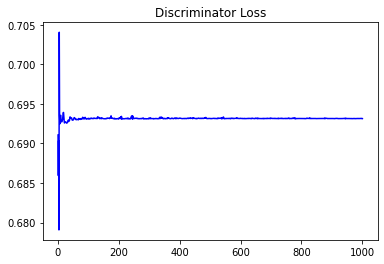

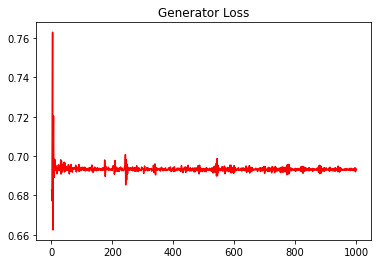

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14982730035302522


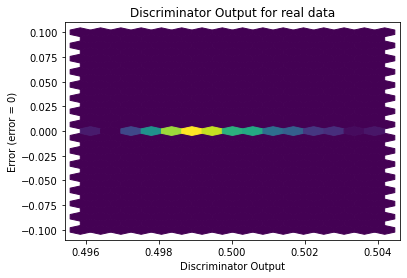

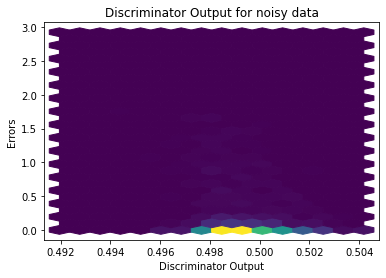

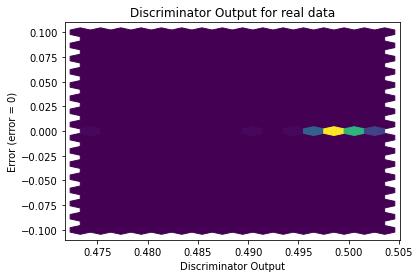

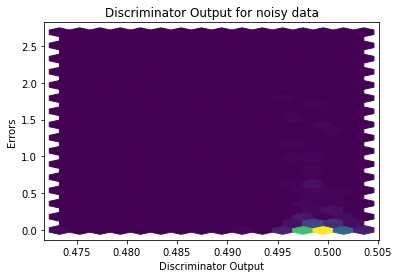

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


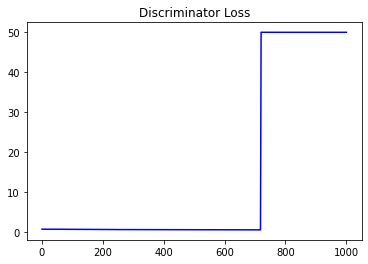

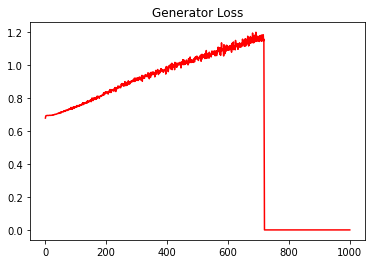

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
124.83822345390762


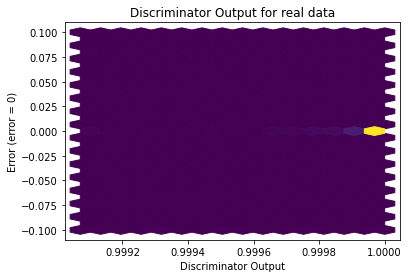

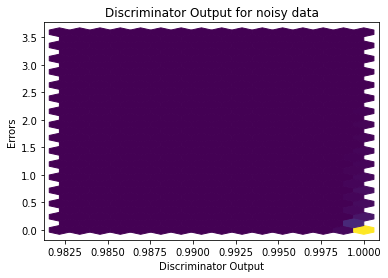

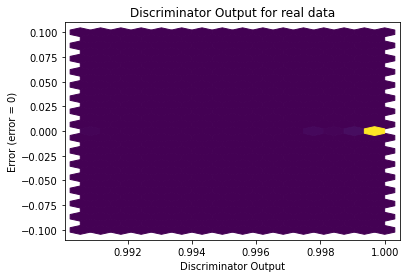

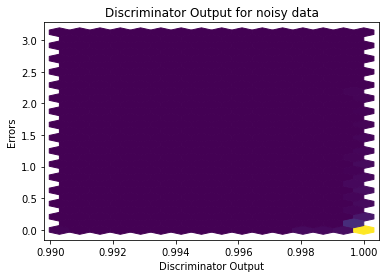

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0300]], requires_grad=True)
